### Use decision trees to prepare a model on fraud data 
### treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
fraud_data = pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
fraud_data["income"]="<=30000"
fraud_data.loc[fraud_data["Taxable.Income"]>=30000,"income"]="Good"
fraud_data.loc[fraud_data["Taxable.Income"]<=30000,"income"]="Risky"

In [6]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [9]:
categ = ['Undergrad','Marital.Status','Urban','income']

# Encode Categorical Columns
le = LabelEncoder()
fraud_data[categ] = fraud_data[categ].apply(le.fit_transform)

In [10]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [11]:
x=fraud_data.drop(labels='income',axis=1)
y=fraud_data[['income']]

In [12]:
x.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [13]:
y.head()

,income
0,0
1,0
2,0
3,0
4,0


In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [15]:
x_train.shape,x_test.shape

((480, 6), (120, 6))

In [16]:
dt_model=DecisionTreeClassifier(criterion="entropy",max_depth=5)
dt_model.fit(x_train,y_train)
y_pred_train=dt_model.predict(x_train)

In [17]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00        98

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [18]:
print(confusion_matrix(y_train,y_pred_train))

[[382   0]
 [  0  98]]


In [19]:
accuracy_score(y_train,y_pred_train)

1.0

In [20]:
y_pred_test=dt_model.predict(x_test)

In [21]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [22]:
print(confusion_matrix(y_test,y_pred_test))

[[94  0]
 [ 0 26]]


In [23]:
accuracy_score(y_test,y_pred_test)

1.0

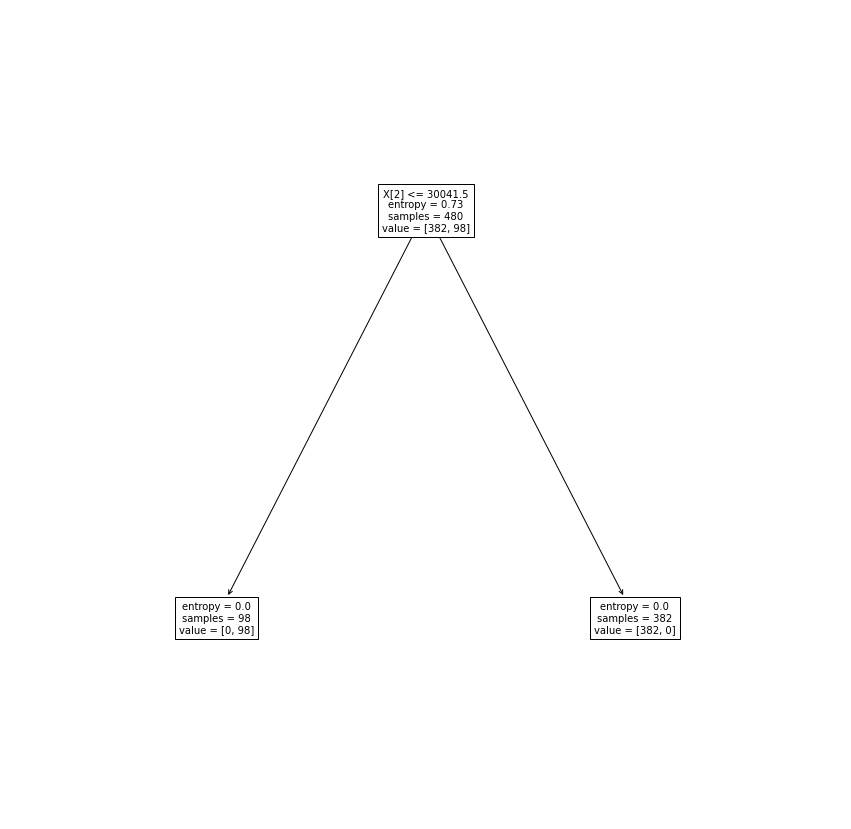

In [24]:
plt.figure(figsize=(15 , 15 ))
tree.plot_tree(dt_model , fontsize= 10);

### With Criterion as Gini Index

In [25]:
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=5)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [26]:
y_pred_train1= model_gini.predict(x_train)

In [27]:
print(classification_report(y_train,y_pred_train1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00        98

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [28]:
print(confusion_matrix(y_train,y_pred_train1))

[[382   0]
 [  0  98]]


In [29]:
accuracy_score(y_train,y_pred_train1)

1.0

In [30]:
y_pred_test1=model_gini.predict(x_test)

In [31]:
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [32]:
print(confusion_matrix(y_test,y_pred_test1))

[[94  0]
 [ 0 26]]


In [33]:
accuracy_score(y_test,y_pred_test1)

1.0

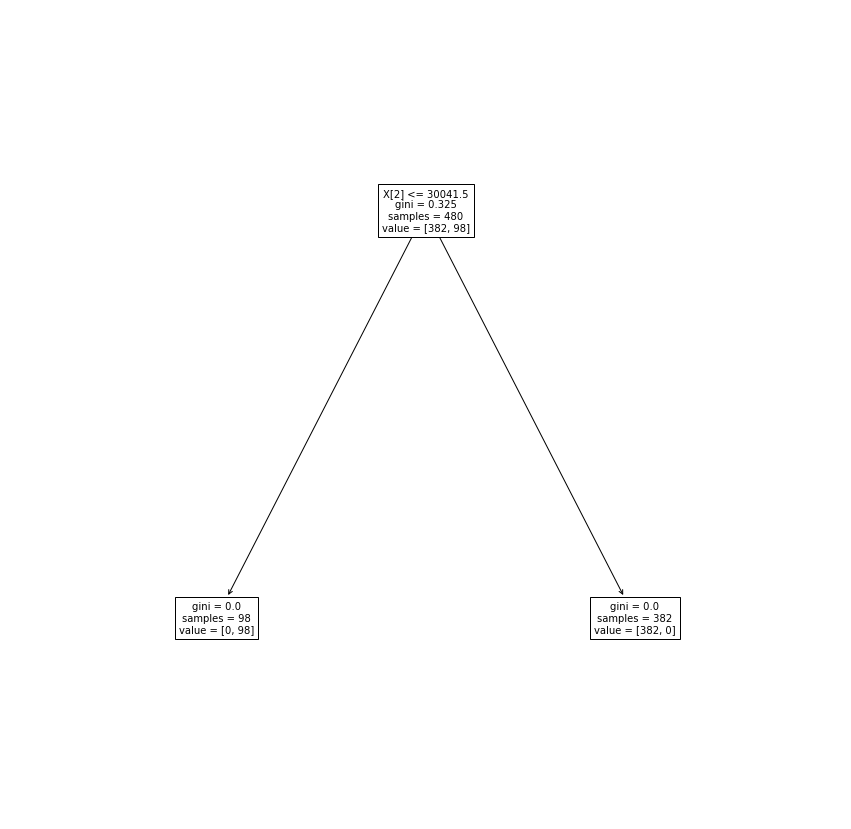

In [34]:
plt.figure(figsize=(15 , 15 ))
tree.plot_tree(model_gini , fontsize= 10);